In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score

In [2]:
def make_dataset(data, label, window_size=5):
    feature_list = []
    label_list = []

    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i:i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [3]:
df = pd.read_csv("../data_dir/train_APPLE_0619.csv")
df["Medium"] = df[["High", "Low"]].mean(axis = 1)
feature_Df = df[["High", "Low", "Open", "Medium"]]
target_Df = df["Close"]
train_Feature, train_Label = make_dataset(feature_Df, target_Df)

In [4]:
feature = 4
timesteps = 5
cell_size = 16
#learning_rate = 0.1
batch_size = 32
epochs = 50


input_shape = (timesteps, feature)
model = models.Sequential()
model.add(layers.LSTM(cell_size, input_shape = input_shape,activation="relu", return_sequences = False))
#model.add(layers.Dropout(0.2))
#model.add(layers.LSTM(cell_size))
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))
optimizer = K.optimizers.Adam() #(lr = learning_rate)
loss_func = K.losses.mse
acc = K.metrics.RootMeanSquaredError
model.compile(optimizer = optimizer, loss = loss_func, metrics = [K.metrics.RootMeanSquaredError()])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 16)                1344      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 1,361
Trainable params: 1,361
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(train_Feature, train_Label, epochs = epochs, batch_size = batch_size)

Epoch 1/50
311/311 [==============================] - 23s 44ms/step - loss: 54.6412 - root_mean_squared_error: 6.7794
Epoch 2/50
311/311 [==============================] - 14s 44ms/step - loss: 0.1930 - root_mean_squared_error: 0.4374
Epoch 3/50
311/311 [==============================] - 14s 44ms/step - loss: 0.2290 - root_mean_squared_error: 0.4757
Epoch 4/50
311/311 [==============================] - 14s 44ms/step - loss: 0.2069 - root_mean_squared_error: 0.4532
Epoch 5/50
311/311 [==============================] - 14s 44ms/step - loss: 0.2351 - root_mean_squared_error: 0.4842
Epoch 6/50
311/311 [==============================] - 14s 44ms/step - loss: 0.2264 - root_mean_squared_error: 0.4754
Epoch 7/50
311/311 [==============================] - 14s 44ms/step - loss: 0.2127 - root_mean_squared_error: 0.4606
Epoch 8/50
311/311 [==============================] - 14s 44ms/step - loss: 0.2397 - root_mean_squared_error: 0.4893
Epoch 9/50
311/311 [==============================] - 13s 43ms/

In [7]:
test_df = pd.read_csv("../data_dir/test_APPLE_0619.csv")
test_df["Medium"] = test_df[["High", "Low"]].mean(axis = 1)
feature_test = test_df[["High", "Low", "Open", "Medium"]]
target_test = test_df["Close"]
test_Feature, test_Label = make_dataset(feature_test, target_test)


In [8]:
pred = model.predict(test_Feature)

In [9]:
pred

array([[126.87987 ],
       [128.45859 ],
       [130.09059 ],
       [131.3145  ],
       [132.68802 ],
       [133.56708 ],
       [134.15334 ],
       [134.59976 ],
       [134.73865 ],
       [134.46056 ],
       [134.07314 ],
       [133.94696 ],
       [134.16647 ],
       [134.43346 ],
       [134.68912 ],
       [135.04965 ],
       [134.72461 ],
       [134.35202 ],
       [133.30534 ],
       [132.08218 ],
       [130.78458 ],
       [130.62009 ],
       [129.92435 ],
       [128.85922 ],
       [127.5912  ],
       [126.87114 ],
       [126.377594],
       [126.2846  ],
       [126.50636 ],
       [126.3983  ],
       [126.53174 ],
       [126.72553 ],
       [126.88223 ],
       [127.224266],
       [127.7953  ],
       [127.720215],
       [127.425385],
       [126.90474 ],
       [126.31093 ],
       [125.82437 ],
       [125.5016  ],
       [125.718124],
       [126.248695],
       [126.87291 ],
       [127.444595],
       [127.717766],
       [128.23416 ],
       [128.9

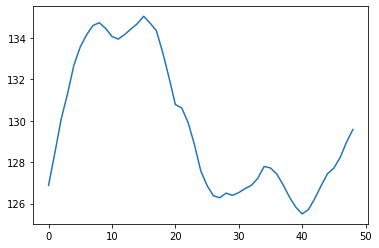

In [10]:
plt.plot(range(len(pred)), pred)

In [11]:
model.save("../models/my_model_APPLE")

INFO:tensorflow:Assets written to: my_model_APPLE/assets
